# Used libraries 

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0);

# PyTorch

A Deep Learning framework providing:

* Numerical mathematics (linear algebra, common mathematical functions, ...)
* Automatic differentiation (gradient, Jacobian, Hessian...)
* Deep Learning tools (neural-network layers, optimizers, datasets...)



# Computer algebra in PyTorch

The ``torch.tensor`` object is a multidimensional array

In [3]:
A = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]])
A

tensor([[1., 2.],
        [3., 4.]])

In [4]:
A.shape, A.dtype

(torch.Size([2, 2]), torch.float32)

In [5]:
x = torch.ones((2, 1)) # torch.zeros, torch.eye, ...
x

tensor([[1.],
        [1.]])

In [6]:
I = torch.eye(2); I

tensor([[1., 0.],
        [0., 1.]])

In [7]:
t = torch.linspace(0, 1, 5); t

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

Commands like ``eye``, ``ones`` are close to (``numpy`` and ``MATLAB``).

## Operations: basics

The ``torch.tensor`` support linear algebra and standard trascendental function support. Let us define:

\begin{equation}
A = \begin{bmatrix}1.0 & 2.0 \\
                   3.0 & 4.0
    \end{bmatrix}, \qquad
I = \begin{bmatrix}1.0 & 0.0 \\
                   0.0 & 1.0
    \end{bmatrix} 
\end{equation}

In [8]:
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]]); I = torch.eye(2)

In [9]:
A + I # element-wise addition (works with +-/*)

tensor([[2., 2.],
        [3., 5.]])

In [10]:
A @ I # matrix multiplication, A @ I = A.

tensor([[1., 2.],
        [3., 4.]])

In [11]:
A * I # element-wise multiplication

tensor([[1., 0.],
        [0., 4.]])

In [12]:
torch.exp(A) # element-wise unary (one-argument) ops: exp, sin, cos, log, tan, tanh. Note: torch.matrix_exp is the *matrix* exponential instead!

tensor([[ 2.7183,  7.3891],
        [20.0855, 54.5982]])

## Operations: combining tensors


Tensor manipulation tools like ``concatenate`` and ``stack`` are also super useful.

In [13]:
A

tensor([[1., 2.],
        [3., 4.]])

In [14]:
I 

tensor([[1., 0.],
        [0., 1.]])

In [15]:
torch.concatenate((A, I), axis=0)

tensor([[1., 2.],
        [3., 4.],
        [1., 0.],
        [0., 1.]])

In [16]:
torch.concatenate((A, I), axis=1)

tensor([[1., 2., 1., 0.],
        [3., 4., 0., 1.]])

Stack instead adds an extra dimension

In [17]:
torch.stack((A, I, I), axis=0).shape

torch.Size([3, 2, 2])

In [18]:
torch.stack((A, I, I), axis=1).shape

torch.Size([2, 3, 2])

## Operations: broadcasting I 

Binary operations: two operands. All standard arithmetics!

When the two operands have the same shape, they are applied element-wise

In [19]:
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]]); A

tensor([[1., 2.],
        [3., 4.]])

In [20]:
A + torch.eye(2)

tensor([[2., 2.],
        [3., 5.]])

Broadcasting extends the behavior to operands with different, yet compatible shape. Simplest case: scalar operand

In [21]:
torch.tensor(2.0) * A # multiplication is done element-wise.

tensor([[2., 4.],
        [6., 8.]])

Intuitive, and in line with standard algebra (scalar-matrix multiplication)

## Operations: broadcasting II


The standard linear algebra operations are **extended** with broadcasting behavior. Let us define:

\begin{equation}
X = \begin{bmatrix}1.0 & 2.0 \\
                   3.0 & 4.0 \\
                   5.0 & 6.0
    \end{bmatrix}, \qquad
b = \begin{bmatrix}0.5 & 1.0\end{bmatrix} 
\end{equation}

In [22]:
X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]); b = torch.tensor([0.5, 1.0]); X + b

tensor([[1.5000, 3.0000],
        [3.5000, 5.0000],
        [5.5000, 7.0000]])

The 1D tensor (vector) $b$ is added to **all the rows** of the 2D tensor (matrix) A: 

\begin{equation}
\begin{bmatrix}\
1.0 & 2.0 \\
3.0 & 4.0 \\
5.0 & 6.0
\end{bmatrix} + 
\begin{bmatrix}
0.5 & 1.0 \\
0.5 & 1.0 \\
0.5 & 1.0
\end{bmatrix}
=
\begin{bmatrix}
1.5 & 3.0 \\
3.5 & 5.0 \\
5.5 & 7.0
\end{bmatrix}
\end{equation}

This goes beyond standard linear algebra. Roughly speaking, the tensor with fewer dimensions is repeated over the missing dimensions.

General broadcasting rules in the [PyTorch](https://docs.pytorch.org/docs/stable/notes/broadcasting.html) (or [Numpy](https://numpy.org/doc/stable/user/basics.broadcasting.html)) documentation.



## Automatic Differentiation

Numerical math alone is not so special. The added value of PyTorch (and JAX, Tensorflow, CasADi, ...) is *automatic differentiation*.

$$f(x) : \mathbb{R}^{3} \rightarrow \mathbb{R} =  x_1^2 + x_2^2 + x_3^2 $$

In [23]:
x = torch.randn(3, requires_grad=True); # inform pytorch that you will need gradients wrt this variable
y = torch.sum(x**2)

What's $\nabla f(x)$? Hard pen-and-paper derivation...
$$\nabla f(x): \mathbb{R}^{3} \rightarrow \mathbb{R}^{3} =
\begin{bmatrix}
2x_1 \\ 2x_2 \\ 2x_3 
\end{bmatrix}
$$

In [24]:
dx_manual = 2 * x; dx_manual # hard pen-and-paper calculations required!

tensor([ 3.0820, -0.5869, -4.3576], grad_fn=<MulBackward0>)

PyTorch will save you the pain!

In [25]:
dx = torch.autograd.grad(y, x)[0]; dx

tensor([ 3.0820, -0.5869, -4.3576])

## Learning a Linear Model

Let us consider a linear model $f: \mathbb{R} \rightarrow \mathbb{R}$
$$y = a x + b = \overbrace{[x\; 1]}^{\phi^\top} \overbrace{\begin{bmatrix} a \\ b\end{bmatrix}}^\theta$$
True parameters: $\theta_o = \begin{bmatrix} a & b\end{bmatrix}^\top = \begin{bmatrix} 1.0 & 2.0\end{bmatrix}^\top$

In [26]:
theta_true = torch.tensor([[1.0], [2.0]]) # true, unknown value

In [27]:
def linear_model(theta, x):
    y = theta[0] * x + theta[1]
    return y

In [28]:
linear_model(theta_true, torch.tensor([1.0]))

tensor([3.])

In [29]:
 linear_model(theta_true, torch.tensor([[1.0],
                                        [1.0]])) # y = 1 * x + 2

tensor([[3.],
        [3.]])

The implementation of ``linear_model`` accepts either a single data point $x \in \mathbb{R}$ or a dataset/minibatch $X \in \mathbb{R}^{N \times 1}$.



The *batched* case actually exploits the broadcasting behavior of PyTorch!

$$ y = a \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + b = 
\begin{bmatrix}a x_1 \\ a x_2 \end{bmatrix} + b = \begin{bmatrix}a x_1 + b\\ a x_2 + b\end{bmatrix}$$

Let us define some fake data:

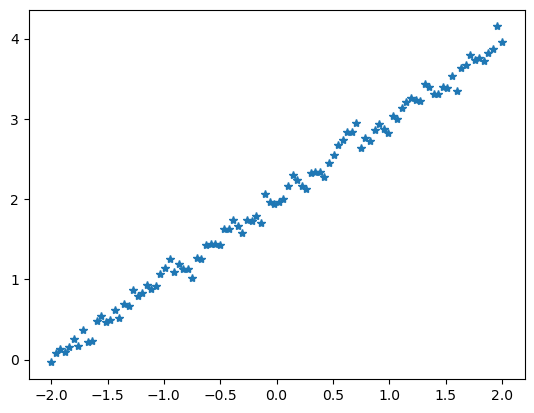

In [30]:
# Let us define some fake data
N = 100
x = torch.linspace(-2, 2, 100).reshape(-1, 1)
y = linear_model(theta_true, x) + torch.randn(N, 1) * 0.1
plt.plot(x, y, "*");


# Least squares

Given the $N$ observations $y = [y_1 \dots y_N], x = [x_1 \dots x_N]$, the least square estimate of $\theta_o$ is defined by:

$$\hat \theta = \arg \min_\theta  \overbrace{\frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2}^{=\mathcal{L}(\theta)}, \qquad \hat y_i = a x_i + b$$

It has the closed-form solution:
$$ y = \overbrace{\begin{bmatrix}x_1 & 1\\ x_2 & 1 \\ \dots\\ x_N & 1 \end{bmatrix}}^{=\Phi} \theta, \qquad 
\mathcal{L} = (y-\Phi \theta)^\top (y-\Phi \theta), \qquad
\hat \theta = (\Phi^T\Phi)^{-1}\Phi^T y $$

In [31]:
PHI = torch.hstack((x, torch.ones(N, 1)))
theta_hat = torch.linalg.lstsq(PHI, y, rcond=None).solution; theta_hat

tensor([[0.9903],
        [1.9998]])

Closed-form solution known for few special problems (eg, linear in the parameters). For all the others, we need numerical optimization! 

# Least squares with gradient descent


The simplest algorithm: plain **gradient** descent. For $i=1,2,\dots$:
$$ \theta_{i+1} = \theta_i - \lambda \nabla_\theta \mathcal{L}(\theta)$$


Even this trivial algorithm needs (efficient) computation of gradients of a loss wrt parameters. For linear least squares the gradient is:

\begin{equation}
y = \Phi \theta \Rightarrow  \nabla \mathcal{L}(\theta) =  \Phi^\top(y - \Phi \theta)
\end{equation}

In [32]:
theta_opt = torch.randn((2, 1))
theta_opt # random initialization

tensor([[0.5684],
        [1.8929]])

In [33]:
lr = 0.1
LOSS = []
for _ in range(100):
    y_hat = linear_model(theta_opt, x)
    loss = torch.mean((y - y_hat)**2)
    grad = 2 *  PHI.T @ (y_hat - y) / N
    theta_opt -= lr * grad
    LOSS.append(loss.item())

In [34]:
theta_opt

tensor([[0.9903],
        [1.9998]])

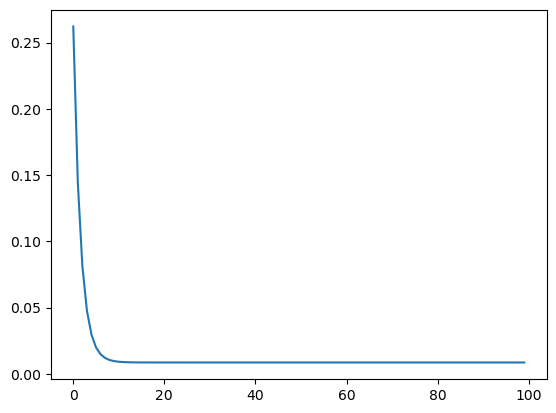

In [35]:
plt.plot(LOSS);

## Backpropagation

PyTorch can compute these nasty derivatives for you!

In [36]:
theta_opt = torch.randn((2, 1), requires_grad=True) # torch need to know that we will ask the gradient of this

y_hat = linear_model(theta_opt, x)
loss = torch.mean((y - y_hat)**2)

In [37]:
grad = torch.autograd.grad(loss, theta_opt)[0] # or loss.backward(), see then gradients are stored in loss.grad. See later...
grad

tensor([[ 5.7694],
        [-4.9164]])

In [38]:
manual_grad = 2 * PHI.T @ (y_hat - y) / N
grad - manual_grad # small numerical difference

tensor([[-4.7684e-07],
        [ 4.7684e-07]], grad_fn=<SubBackward0>)

Training by gradient descent is just a for loop!

In [39]:
LOSS = []
for _ in range(100):
    y_hat = linear_model(theta_opt, x)
    loss = torch.mean((y - y_hat)**2)
    grad = torch.autograd.grad(loss, theta_opt)[0]
    theta_opt.data -= lr * grad
    LOSS.append(loss.item())
theta_opt # true value is [1, 2]

tensor([[0.9903],
        [1.9998]], requires_grad=True)

Training neural networks with (reverse-mode) automatic differentiation is also called back-propagation.

## The computational graph

In [40]:
# pip install torchviz
import torchviz

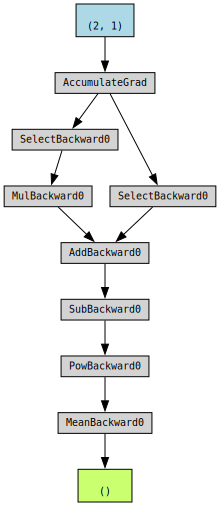

In [41]:
y_hat = linear_model(theta_opt, x)
loss = torch.mean((y - y_hat)**2)
torchviz.make_dot(loss)

PyTorch keeps track of the operations and applies reverse-mode AD to compute the derivatives

In [42]:
torch.autograd.grad(loss, (theta_opt))

(tensor([[ 2.5472e-07],
         [-5.7789e-07]]),)